## Loading the Dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import xgboost as xgb



In [5]:
period_df = pd.read_csv("Datasets/Period_Log.csv")

In [6]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,NaN,Luteal,Heavy,9,Yes,6,...,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,33.0,Follicular,Light,2,No,8,...,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,33.0,Follicular,Heavy,8,No,5,...,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,34.0,Luteal,Light,3,No,8,...,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,31.0,Luteal,Moderate,3,No,9,...,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


## Data Cleaning 

In [7]:
period_df.shape

(17976, 21)

#### Exploring period_df

In [8]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 17976 non-null  object 
 1   cycle_number            17976 non-null  int64  
 2   start_date              17976 non-null  object 
 3   cycle_length_days       17976 non-null  int64  
 4   prev_cycle_length       15976 non-null  float64
 5   cycle_phase             17976 non-null  object 
 6   flow_level              17976 non-null  object 
 7   pain_level              17976 non-null  int64  
 8   pms_symptoms            17976 non-null  object 
 9   mood_score              17976 non-null  int64  
 10  stress_score_cycle      17976 non-null  float64
 11  sleep_hours_cycle       17976 non-null  float64
 12  energy_level            17976 non-null  int64  
 13  concentration_score     17976 non-null  int64  
 14  work_hours_lost         17976 non-null

### Checking the missing values

In [9]:
period_df.isnull().sum()

user_id                      0
cycle_number                 0
start_date                   0
cycle_length_days            0
prev_cycle_length         2000
cycle_phase                  0
flow_level                   0
pain_level                   0
pms_symptoms                 0
mood_score                   0
stress_score_cycle           0
sleep_hours_cycle            0
energy_level                 0
concentration_score          0
work_hours_lost              0
estrogen_pgml                0
progesterone_ngml            0
ovulation_result             0
overall_health_score         0
log_consistency_score        0
prepared_before_period       0
dtype: int64

### Handling the missing values

### Check the distribution of 'prev_cycle_length' 


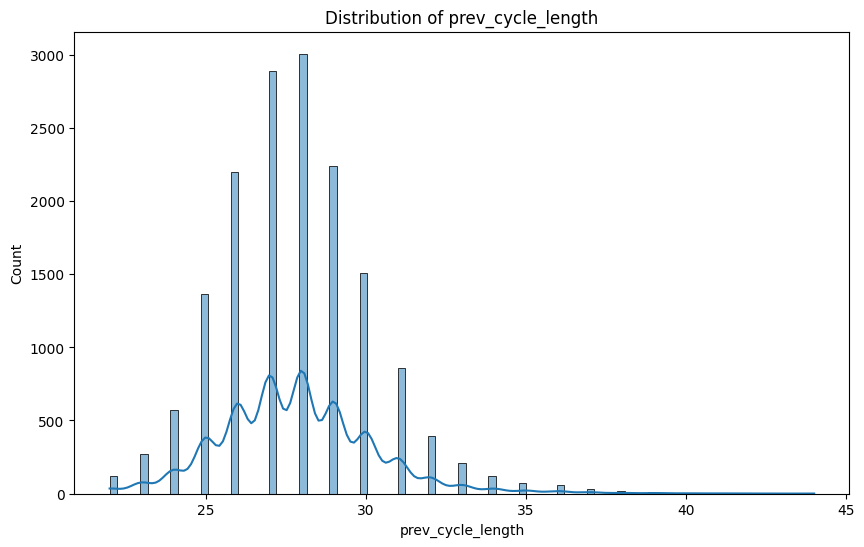

Skewness of prev_cycle_length: 0.7237115128820454


In [10]:
plt.figure(figsize=(10, 6))

sns.histplot(period_df['prev_cycle_length'], kde=True)
plt.title('Distribution of prev_cycle_length')
plt.show()

skewness = period_df['prev_cycle_length'].skew()
print(f"Skewness of prev_cycle_length: {skewness}")


In [11]:
period_df['prev_cycle_length'] = period_df['prev_cycle_length'].fillna(period_df['prev_cycle_length'].median())


In [12]:
period_df.isnull().sum()

user_id                   0
cycle_number              0
start_date                0
cycle_length_days         0
prev_cycle_length         0
cycle_phase               0
flow_level                0
pain_level                0
pms_symptoms              0
mood_score                0
stress_score_cycle        0
sleep_hours_cycle         0
energy_level              0
concentration_score       0
work_hours_lost           0
estrogen_pgml             0
progesterone_ngml         0
ovulation_result          0
overall_health_score      0
log_consistency_score     0
prepared_before_period    0
dtype: int64

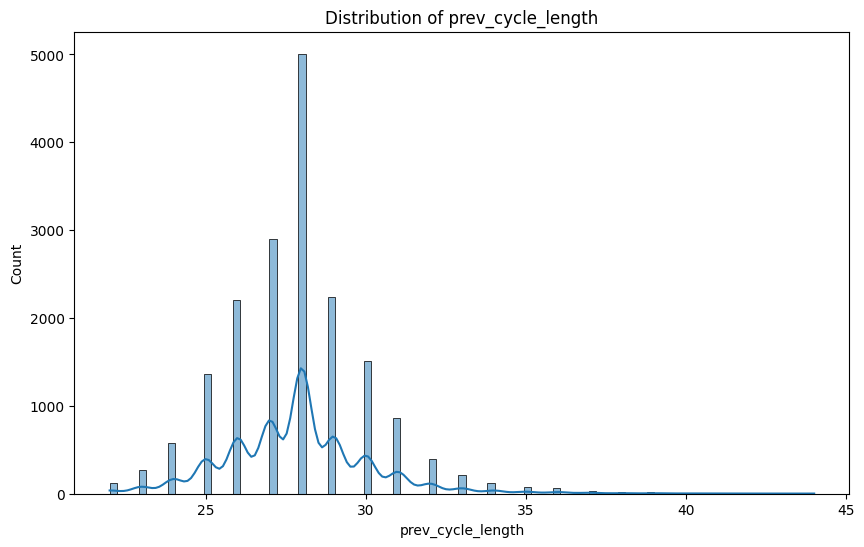

Skewness of prev_cycle_length: 0.7415121913921537


In [13]:
plt.figure(figsize=(10, 6))

sns.histplot(period_df['prev_cycle_length'], kde=True)
plt.title('Distribution of prev_cycle_length')
plt.show()

skewness = period_df['prev_cycle_length'].skew()
print(f"Skewness of prev_cycle_length: {skewness}")

In [14]:
period_df.shape

(17976, 21)

In [15]:
period_df['prev_cycle_length'] = period_df['prev_cycle_length'].astype('int64')

In [16]:
print(period_df['prev_cycle_length'].dtype)

int64


In [17]:
period_df['prev_cycle_length']

0        28
1        33
2        33
3        34
4        31
         ..
17971    26
17972    26
17973    27
17974    30
17975    29
Name: prev_cycle_length, Length: 17976, dtype: int64

In [18]:
most_frequent_value = period_df['prev_cycle_length'].mode()[0]
print(most_frequent_value)


28


In [19]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 17976 non-null  object 
 1   cycle_number            17976 non-null  int64  
 2   start_date              17976 non-null  object 
 3   cycle_length_days       17976 non-null  int64  
 4   prev_cycle_length       17976 non-null  int64  
 5   cycle_phase             17976 non-null  object 
 6   flow_level              17976 non-null  object 
 7   pain_level              17976 non-null  int64  
 8   pms_symptoms            17976 non-null  object 
 9   mood_score              17976 non-null  int64  
 10  stress_score_cycle      17976 non-null  float64
 11  sleep_hours_cycle       17976 non-null  float64
 12  energy_level            17976 non-null  int64  
 13  concentration_score     17976 non-null  int64  
 14  work_hours_lost         17976 non-null

In [20]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'prev_cycle_length', 'cycle_phase', 'flow_level', 'pain_level',
       'pms_symptoms', 'mood_score', 'stress_score_cycle', 'sleep_hours_cycle',
       'energy_level', 'concentration_score', 'work_hours_lost',
       'estrogen_pgml', 'progesterone_ngml', 'ovulation_result',
       'overall_health_score', 'log_consistency_score',
       'prepared_before_period'],
      dtype='object')

In [21]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2/13/2024,33,28,Luteal,Heavy,9,Yes,6,...,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,3/17/2024,33,33,Follicular,Light,2,No,8,...,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,4/19/2024,34,33,Follicular,Heavy,8,No,5,...,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,5/23/2024,31,34,Luteal,Light,3,No,8,...,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,6/23/2024,31,31,Luteal,Moderate,3,No,9,...,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


### Data Exploration

#### Categorical Feature Analysis

In [22]:
categorical_cols = period_df.select_dtypes(include = 'object')
print(categorical_cols.columns)

Index(['user_id', 'start_date', 'cycle_phase', 'flow_level', 'pms_symptoms',
       'ovulation_result'],
      dtype='object')


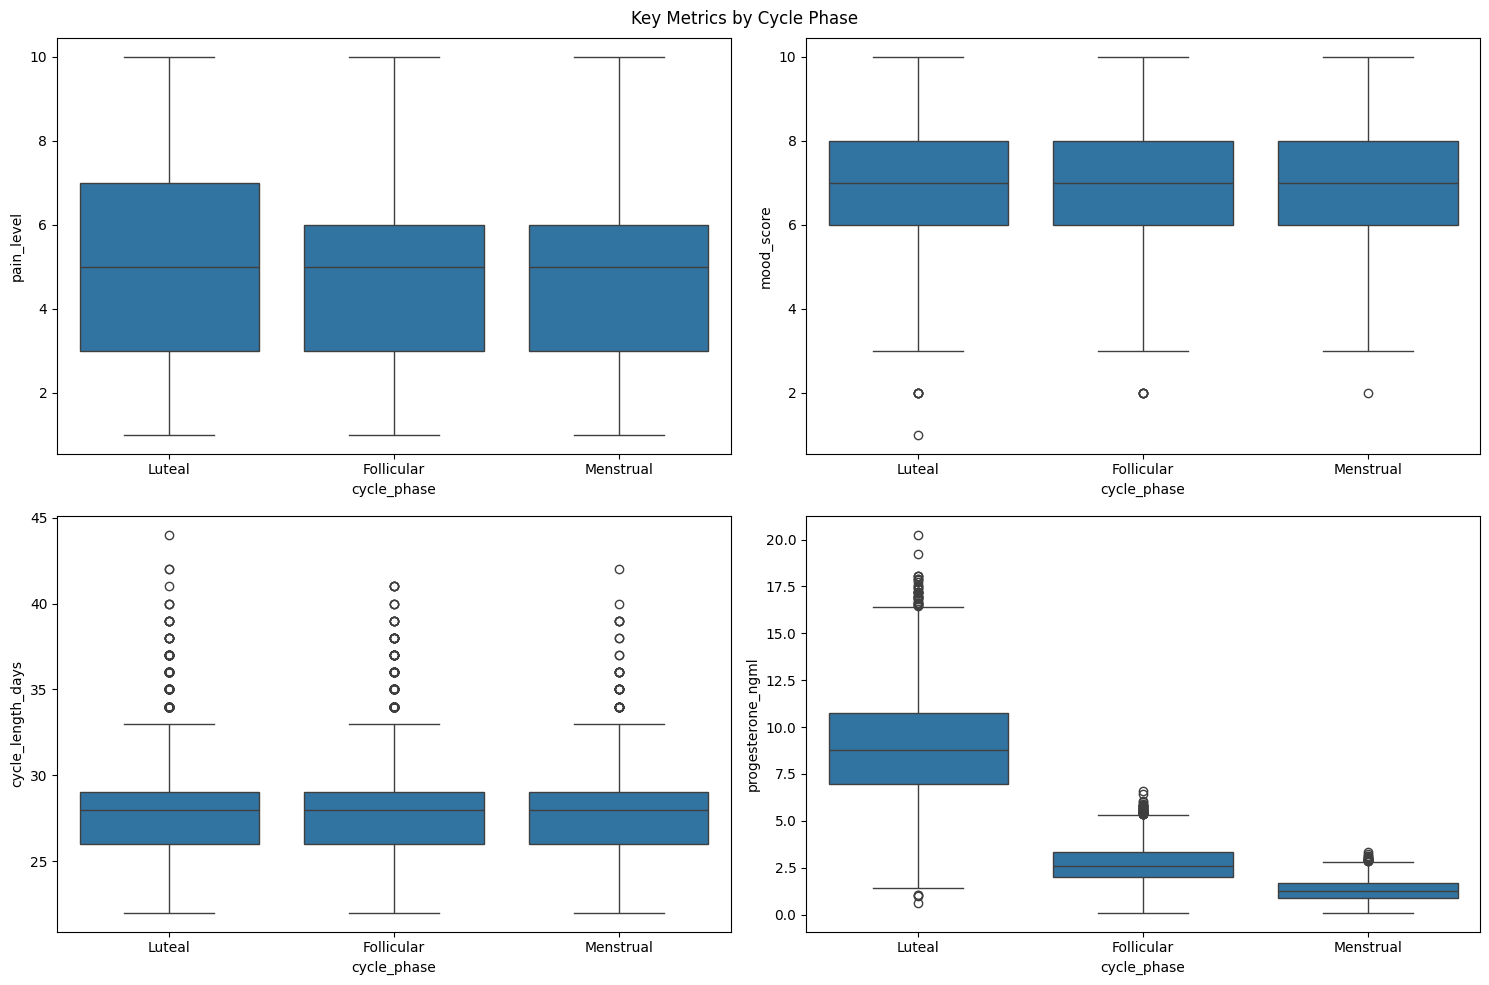

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=period_df, x='cycle_phase', y='pain_level', ax=axes[0,0])
sns.boxplot(data=period_df, x='cycle_phase', y='mood_score', ax=axes[0,1])
sns.boxplot(data=period_df, x='cycle_phase', y='cycle_length_days', ax=axes[1,0])
sns.boxplot(data=period_df, x='cycle_phase', y='progesterone_ngml', ax=axes[1,1])
plt.suptitle('Key Metrics by Cycle Phase')
plt.tight_layout()
plt.show()


#### Insights

- **Median cycle length:** ~28 days across all three phases.
- **Outliers:** Some cycles reach up to ≈40–44 days, indicating that significantly longer cycles are rare.
- **Cycle pattern:** Most cycles remain around 28 days.
- **Progesterone levels:**
  - **Luteal phase:** Much higher
  - **Follicular/Menstrual phases:** Low


### Numerical Feature Analysis

In [24]:
period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 17976 non-null  object 
 1   cycle_number            17976 non-null  int64  
 2   start_date              17976 non-null  object 
 3   cycle_length_days       17976 non-null  int64  
 4   prev_cycle_length       17976 non-null  int64  
 5   cycle_phase             17976 non-null  object 
 6   flow_level              17976 non-null  object 
 7   pain_level              17976 non-null  int64  
 8   pms_symptoms            17976 non-null  object 
 9   mood_score              17976 non-null  int64  
 10  stress_score_cycle      17976 non-null  float64
 11  sleep_hours_cycle       17976 non-null  float64
 12  energy_level            17976 non-null  int64  
 13  concentration_score     17976 non-null  int64  
 14  work_hours_lost         17976 non-null

In [25]:
numerical_cols = period_df.select_dtypes(exclude='object')
print(numerical_cols.columns)

Index(['cycle_number', 'cycle_length_days', 'prev_cycle_length', 'pain_level',
       'mood_score', 'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period'],
      dtype='object')


### Correlation Matrix - HeatMap

In [26]:
numerical_cols_list = period_df.select_dtypes(include=['int32', 'int64', 'float64']).columns
print(numerical_cols_list)

Index(['cycle_number', 'cycle_length_days', 'prev_cycle_length', 'pain_level',
       'mood_score', 'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'overall_health_score', 'log_consistency_score',
       'prepared_before_period'],
      dtype='object')


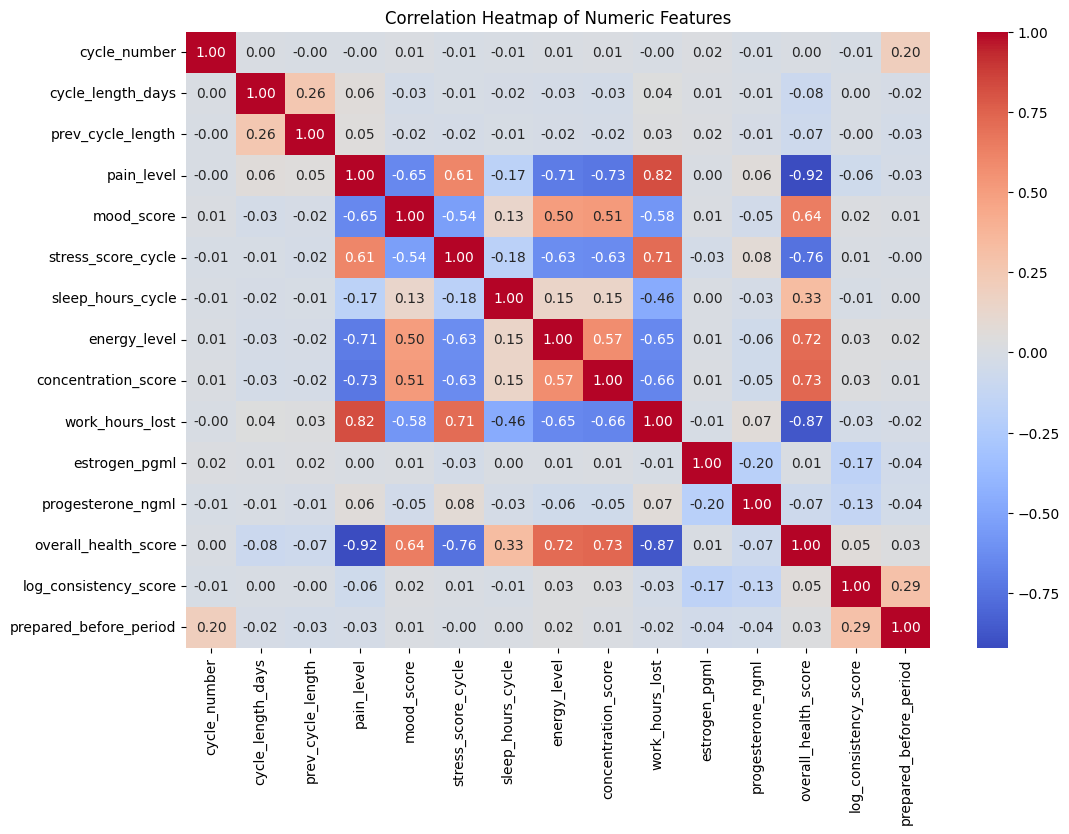

In [27]:
corr = period_df[numerical_cols_list].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Feature Selection

In [28]:
for col in categorical_cols.columns:
    unique_count = categorical_cols[col].nunique()
    print(f"{col}: {unique_count} unique values")
    print(f"  Values: {categorical_cols[col].unique()}\n")

user_id: 2000 unique values
  Values: ['U00001' 'U00002' 'U00003' ... 'U01998' 'U01999' 'U02000']

start_date: 407 unique values
  Values: ['2/13/2024' '3/17/2024' '4/19/2024' '5/23/2024' '6/23/2024' '7/24/2024'
 '8/30/2024' '10/2/2024' '11/2/2024' '12/6/2024' '1/7/2025' '3/13/2024'
 '4/7/2024' '5/4/2024' '6/3/2024' '6/30/2024' '7/25/2024' '8/22/2024'
 '9/19/2024' '10/17/2024' '11/16/2024' '12/10/2024' '1/11/2025'
 '3/15/2024' '4/10/2024' '5/7/2024' '6/4/2024' '7/1/2024' '9/18/2024'
 '11/14/2024' '12/11/2024' '2/1/2024' '2/29/2024' '3/28/2024' '4/24/2024'
 '5/22/2024' '7/21/2024' '8/20/2024' '10/16/2024' '11/12/2024' '3/23/2024'
 '4/28/2024' '7/7/2024' '8/15/2024' '9/15/2024' '3/21/2024' '4/17/2024'
 '5/14/2024' '6/12/2024' '7/8/2024' '8/4/2024' '9/25/2024' '10/20/2024'
 '2/9/2024' '3/8/2024' '4/4/2024' '6/2/2024' '6/27/2024' '8/23/2024'
 '9/22/2024' '2/10/2024' '3/12/2024' '5/8/2024' '6/9/2024' '8/3/2024'
 '8/31/2024' '1/18/2024' '5/3/2024' '5/29/2024' '7/20/2024' '8/17/2024'
 '9/11/2

#### Binary Mapping

In [29]:
period_df['pms_symptoms'] = period_df['pms_symptoms'].map({'Yes': 1 , 'No': 0})
period_df['ovulation_result'] = period_df['ovulation_result'].map({'Positive': 1, 'Negative': 0})

#### One-hot encoding

In [30]:
cols_for_one_hot = ['cycle_phase', 'flow_level']

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(period_df[cols_for_one_hot])

In [31]:
print(encoded_array)

[[0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]]


In [32]:
encoded_cols_names = encoder.get_feature_names_out(cols_for_one_hot)
print(encoded_cols_names)


['cycle_phase_Follicular' 'cycle_phase_Luteal' 'cycle_phase_Menstrual'
 'flow_level_Heavy' 'flow_level_Light' 'flow_level_Moderate']


In [33]:
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols_names, index=period_df.index)

In [34]:
period_df = period_df.drop(columns=cols_for_one_hot).join(encoded_df)

In [35]:
period_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,...,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual,flow_level_Heavy,flow_level_Light,flow_level_Moderate
0,U00001,1,2/13/2024,33,28,9,1,6,5.4,5.3,...,1,6.5,0.949,0,0.0,1.0,0.0,1.0,0.0,0.0
1,U00001,2,3/17/2024,33,33,2,0,8,3.7,4.6,...,0,9.4,0.949,1,1.0,0.0,0.0,0.0,1.0,0.0
2,U00001,3,4/19/2024,34,33,8,0,5,5.7,5.1,...,0,6.7,0.949,1,1.0,0.0,0.0,1.0,0.0,0.0
3,U00001,4,5/23/2024,31,34,3,0,8,5.2,6.7,...,0,9.0,0.949,0,0.0,1.0,0.0,0.0,1.0,0.0
4,U00001,5,6/23/2024,31,31,3,0,9,3.7,5.8,...,0,9.3,0.949,1,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'prev_cycle_length', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'ovulation_result', 'overall_health_score',
       'log_consistency_score', 'prepared_before_period',
       'cycle_phase_Follicular', 'cycle_phase_Luteal', 'cycle_phase_Menstrual',
       'flow_level_Heavy', 'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

### Numerical Features after encoding

In [37]:
numerical_cols_encoded = period_df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols_encoded)

Index(['cycle_number', 'cycle_length_days', 'prev_cycle_length', 'pain_level',
       'pms_symptoms', 'mood_score', 'stress_score_cycle', 'sleep_hours_cycle',
       'energy_level', 'concentration_score', 'work_hours_lost',
       'estrogen_pgml', 'progesterone_ngml', 'ovulation_result',
       'overall_health_score', 'log_consistency_score',
       'prepared_before_period', 'cycle_phase_Follicular',
       'cycle_phase_Luteal', 'cycle_phase_Menstrual', 'flow_level_Heavy',
       'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')


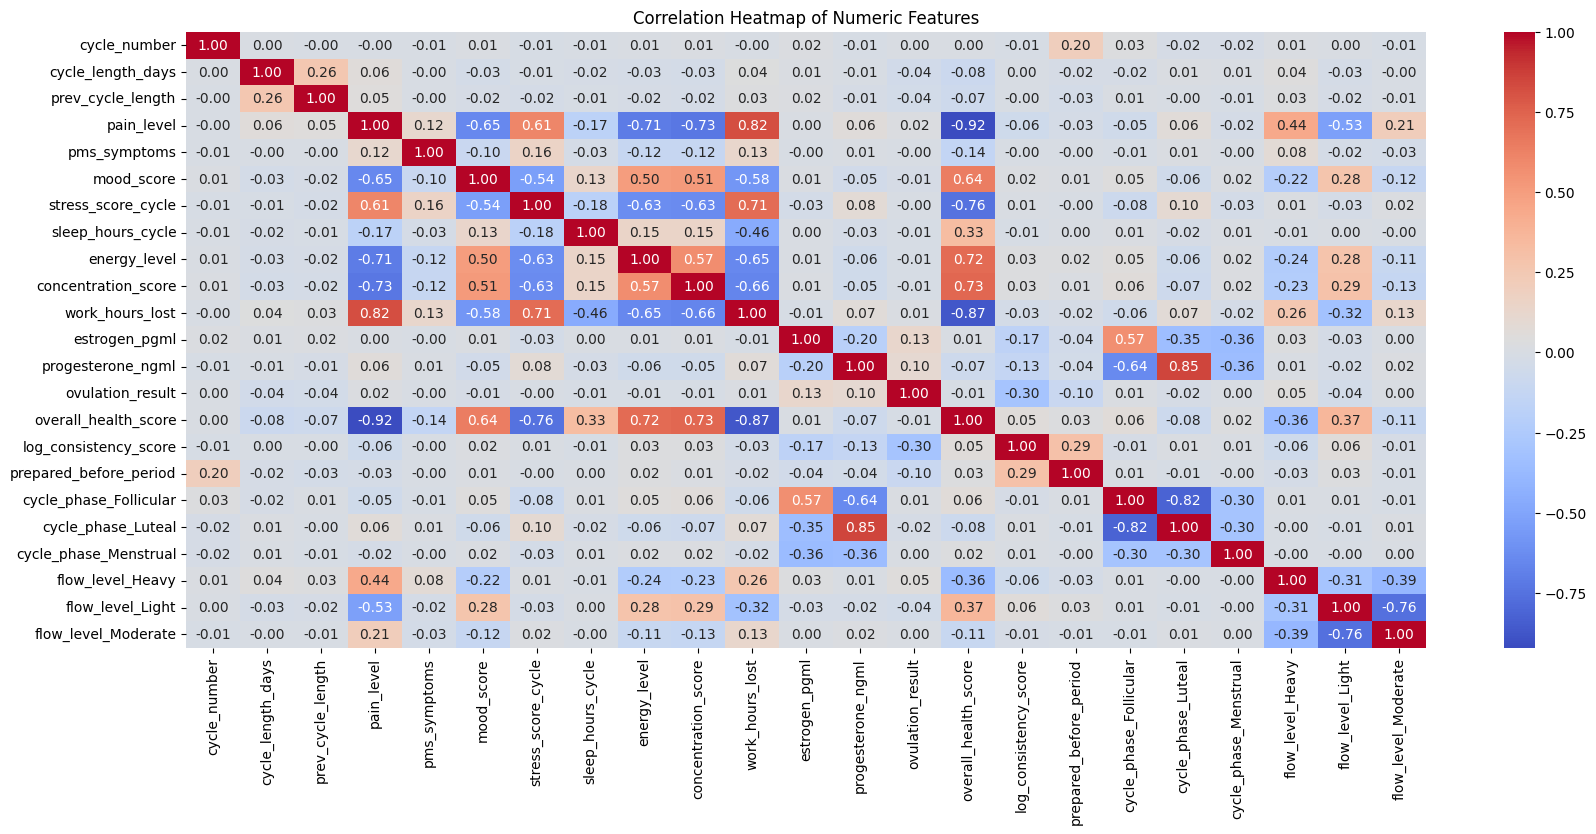

In [38]:
corr = period_df[numerical_cols_encoded].corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm',  fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

#### Feature selection

In [39]:
period_df.columns

Index(['user_id', 'cycle_number', 'start_date', 'cycle_length_days',
       'prev_cycle_length', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'work_hours_lost', 'estrogen_pgml',
       'progesterone_ngml', 'ovulation_result', 'overall_health_score',
       'log_consistency_score', 'prepared_before_period',
       'cycle_phase_Follicular', 'cycle_phase_Luteal', 'cycle_phase_Menstrual',
       'flow_level_Heavy', 'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

In [40]:
period_df['cycle_length_days'].max()

np.int64(44)

In [41]:
period_df.to_csv('Datasets/period_preprocessed.csv', index = False)

In [42]:
target  = 'cycle_length_days'
drop_cols = ['user_id', 'cycle_number', 'start_date', 'work_hours_lost', 'estrogen_pgml','progesterone_ngml', 'ovulation_result', 'log_consistency_score',   'cycle_phase_Follicular', 'cycle_phase_Luteal', 'cycle_phase_Menstrual']

In [43]:
X = period_df.drop(columns=drop_cols + [target]) 
y = period_df[target]

In [44]:
X

,prev_cycle_length,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,overall_health_score,prepared_before_period,flow_level_Heavy,flow_level_Light,flow_level_Moderate
0,28,9,1,6,5.4,5.3,6,7,6.5,0,1.0,0.0,0.0
1,33,2,0,8,3.7,4.6,7,8,9.4,1,0.0,1.0,0.0
2,33,8,0,5,5.7,5.1,5,5,6.7,1,1.0,0.0,0.0
3,34,3,0,8,5.2,6.7,8,8,9.0,0,0.0,1.0,0.0
4,31,3,0,9,3.7,5.8,9,8,9.3,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,26,6,0,7,6.0,5.2,6,7,8.1,1,0.0,0.0,1.0
17972,26,6,1,7,8.2,5.6,8,6,7.6,1,0.0,0.0,1.0
17973,27,6,0,5,7.6,4.5,6,7,7.6,0,0.0,0.0,1.0
17974,30,3,0,8,7.2,4.9,6,8,8.8,1,0.0,1.0,0.0


In [45]:
X.columns

Index(['prev_cycle_length', 'pain_level', 'pms_symptoms', 'mood_score',
       'stress_score_cycle', 'sleep_hours_cycle', 'energy_level',
       'concentration_score', 'overall_health_score', 'prepared_before_period',
       'flow_level_Heavy', 'flow_level_Light', 'flow_level_Moderate'],
      dtype='object')

In [46]:
y

0        33
1        33
2        34
3        31
4        31
         ..
17971    26
17972    27
17973    30
17974    29
17975    27
Name: cycle_length_days, Length: 17976, dtype: int64

#### Train test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression after Encoding

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)


In [50]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Regression Metrics")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

Regression Metrics
MAE: 1.7827065537739386
RMSE: 2.2854757708381577
R²: 0.09621843226936622


### Using Decision Tree and Random Forest 

In [51]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [52]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} (No Tuning) ---")
    print("MAE:\n", mean_absolute_error(y_test, y_pred))
    print("RMSE:\n", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:\n", r2_score(y_test, y_pred))
    print("\n")

--- Decision Tree (No Tuning) ---
MAE:
 1.996941045606229
RMSE:
 2.874023507814528
R²:
 -0.42919296215916436


--- Random Forest (No Tuning) ---
MAE:
 1.484220661846496
RMSE:
 2.0510778932855933
R²:
 0.27209526526620076




### Hyperparameter Tuning using RandomizedSearchCV

#### Random Forest

In [53]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=100, num=3)]

# number of features to consider at every split
max_features = ['sqrt', 'log2']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, 3)]

# minimum number of samples required to split a node
min_samples_split = [2, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]

criterion = ['squared_error', 'absolute_error']

# create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}

print(random_grid)

{'n_estimators': [50, 75, 100], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'criterion': ['squared_error', 'absolute_error']}


In [54]:
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid,
    n_iter=10, 
    cv=3, 
    scoring='neg_mean_absolute_error',
    verbose=2, 
    random_state=42, 
    n_jobs=1
    )
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  42.4s
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  42.3s
[CV] END criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=  51.6s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.6s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.6s
[CV] END criterion=squared_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   0.5s
[CV] END criterion=absolute_error, max_depth=10, max_features=sqrt, m

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [50, 75, 100]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [55]:
rf_randomcv.best_params_

{'n_estimators': 75,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'absolute_error'}

In [56]:
import joblib
joblib.dump(rf_randomcv, 'model/rf_randomcv.pkl')

['model/rf_randomcv.pkl']

In [57]:
rf_randomcv = joblib.load('model/rf_randomcv.pkl')

print(rf_randomcv.best_params_)

{'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'absolute_error'}


In [58]:
best_rf = rf_randomcv.best_estimator_

In [59]:
best_rf

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      max_features='sqrt', n_estimators=75)

In [60]:
y_pred = best_rf.predict(X_test)
print(f"--- {name} (After Tuning) ---")
print("MAE:\n", mean_absolute_error(y_test, y_pred))
print("MSE:\n", mean_squared_error(y_test, y_pred))
print("RMSE:\n", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:\n", r2_score(y_test, y_pred))
print("\n")

--- Random Forest (After Tuning) ---
MAE:
 1.4658509454949944
MSE:
 4.147158917315536
RMSE:
 2.036457443040619
R²:
 0.2824355501481868




## XGBoost

In [61]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=6)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
y_pred = model.predict(X_test)


In [63]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Performance Metrics (without tuning):")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

XGBoost Performance Metrics (without tuning):
MAE: 1.4541016817092896
MSE: 4.052778720855713
RMSE: 2.013151440119623
R²: 0.29876571893692017


In [64]:
# param_dist = {
#     'n_estimators': [100, 200, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 6, 10],
#     'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for training
#     'colsample_bytree': [0.8, 1.0]  # Fraction of features used for each tree
# }

# random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_absolute_error', verbose=2, random_state=42, n_jobs=-1)

# XGBoost Performance Metrics (with tuning):
# MAE: 1.436200499534607
# MSE: 3.9644994735717773
# RMSE: 1.9911050885304316
# R²: 0.3140403628349304

In [65]:
# param_dist = {
#     'n_estimators': [500, 1000, 2000],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [6, 8, 10, 12],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.5, 1.0],
#     'alpha': [0, 0.1, 0.5],
#     'lambda': [0, 1, 10]
# }

In [66]:
param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.8, 1.0]  # Fraction of features used for each tree
}

In [67]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

In [68]:
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_absolute_error', verbose=2, random_state=42, n_jobs=-1)


In [69]:
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 6, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [70]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [71]:
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [72]:
import joblib
joblib.dump(rf_randomcv, 'model/xgb_randomcv.pkl')

['model/xgb_randomcv.pkl']

In [73]:
xgb_randomcv = joblib.load('model/xgb_randomcv.pkl')


In [74]:
print(xgb_randomcv.best_params_)

{'n_estimators': 75, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'absolute_error'}


In [75]:
y_pred_best = best_model.predict(X_test)


In [76]:
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Display the best model performance metrics
print("XGBoost Performance Metrics (with tuning):")
print(f"MAE: {mae_best}")
print(f"MSE: {mse_best}")
print(f"RMSE: {rmse_best}")
print(f"R²: {r2_best}")

XGBoost Performance Metrics (with tuning):
MAE: 1.436200499534607
MSE: 3.9644994735717773
RMSE: 1.9911050885304316
R²: 0.3140403628349304
